# Regressão Linear e Polinomial com Python

- O objetivo deste exercício é criar um modelo que irá prever o preço do imóvel coluna 'Price', com o máximo possível da métrica selecionada por você

#### Realize a importação das bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Crie um dataframe com os dados do arquivo USA_Housing.csv

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


#### Verifique como os dados do preço se distribuem

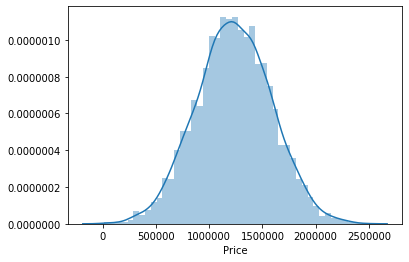

In [5]:
sns.distplot(USAhousing['Price'])

#### Utilize a correlação para identificar o comportamento das variáveis

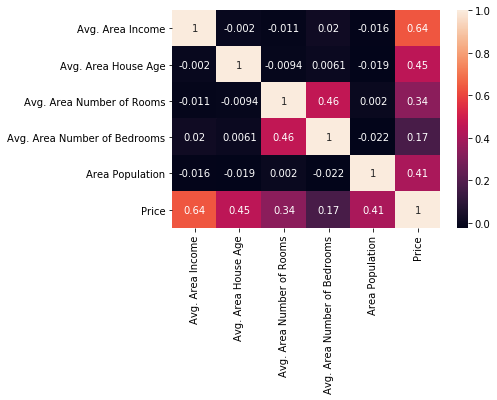

In [6]:
sns.heatmap(USAhousing.corr(), annot=True)

In [7]:
USAhousing.corr()['Price'].sort_values(ascending = False)

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64

#### Se você fosse trabalhar com um modelo linear univariado, qual seria a variável independente que você escolheria como parte do modelo?

- **Resp:** Seria a AVG. Area Income, pois esta é a variável mais correlacionada com o preço

## Criando um modelo de regressão linear

- Como soluções candidatas você pode considerar os seguintes modelos:
    - [Gradiente descendente estocástico - SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor)
    - [Regressão linear](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    - [MLP Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

### Regressão univariada
Crie um modelo de regressão univariada com base na variávei independente escolhida anteriormente.

In [8]:
X = USAhousing['Avg. Area Income'] #Obtenha a coluna de dados referente à variável independente
y = USAhousing['Price']

#### Treino/Teste Split

Vamos criar os nossos dados de treino e teste para o modelo.
- **Dica:** Após criar os dados de treino e teste altere a forma para funcionarem corretamente nos modelos, por exemplo X_train = X_train_uni.values.reshape(-1, 1)

In [9]:
from sklearn.model_selection import train_test_split
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(X, y, test_size=0.3, random_state=101)
#print(X_train_uni.shape, " ", X_test_uni.shape, "\n", y_train_uni.shape, " ", y_test_uni.shape)

In [10]:
#Aplicando reshape
X_train_uni = X_train_uni.values.reshape(-1, 1)
y_train_uni = y_train_uni.values.reshape(-1, 1)
X_test_uni = X_test_uni.values.reshape(-1, 1)
#print(X_train_uni.shape, " ", X_test_uni.shape, "\n", y_train_uni.shape, " ", y_test_uni.shape)

#### Treine o modelo

In [11]:
from sklearn.linear_model import LinearRegression
lm_uni = LinearRegression()
lm_uni.fit(X_train_uni,y_train_uni)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Regressão multivariada

In [12]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Area Population']]
y = USAhousing['Price']

#### Treino/Teste Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Treinando o modelo

In [14]:
lm_multi = LinearRegression(normalize=True)
lm_multi.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

#### Analise a performance do modelo, considerando as métricas abaixo

In [15]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
#Se desejar utilizar o RMSE você precisará aplicar sqrt no mean_squared_error de acordo com a fórmula

## Avaliação do modelo

#### Analise os coeficientes do modelo
- O que significa os valores dos coeficientes do modelo?
- Dica: lm.intercept_

In [16]:
print("========Univariável========")
print("Intercept", lm_uni.intercept_[0])#Avg. Area Income
print("Cofficient", lm_uni.coef_[0][0])

========Univariável========
Intercept -221052.29702309705
Cofficient 21.17520300328745


In [17]:
print("========Multivariável========")
print("Intercept", lm_multi.intercept_)
coeff_df = pd.DataFrame(lm_multi.coef_, X.columns, columns=['Coefficient'])
print("Cofficients:")
print(coeff_df.head())
#coeff_df['Coefficient'].sort_values(ascending=False)

========Multivariável========
Intercept -1780215.5073564376
Cofficients:
                       Coefficient
Avg. Area Income         21.430415
Avg. Area House Age  164747.460506
Area Population          15.430378


### Analisando a qualidade dos resultados

#### Realize as predições para o modelo univariado

In [18]:
predictions_uni = lm_uni.predict(X_test_uni)

#### Desafio:
   - Como temos apenas uma dimensão, é possível plotarmos a relação entre as variáveis. Portanto, plote abaixo a reta gerada pelo modelo criado e os pontos originais.

In [42]:
df = pd.DataFrame(
    {'Area': X_test_uni[:,0],
     'Real': y_test_uni.values,
     'Predito': predictions_uni[:,0]
    }
)

In [39]:
df.head()

,Area,Real,Predito
0,66774.995817,1.251689e+06,1.192922e+06
1,62184.539375,8.730483e+05,1.095718e+06
2,73643.057298,1.696978e+06,1.338354e+06
3,61909.041438,1.063964e+06,1.089884e+06
4,72942.705059,9.487883e+05,1.323524e+06


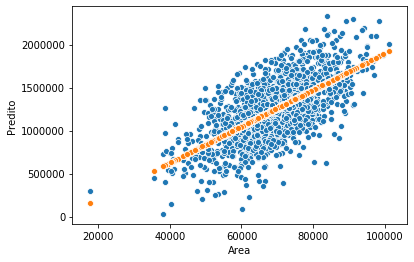

In [47]:
sns.scatterplot(x='Area', y='Real', data=df)
sns.scatterplot(x='Area', y='Predito', data=df)

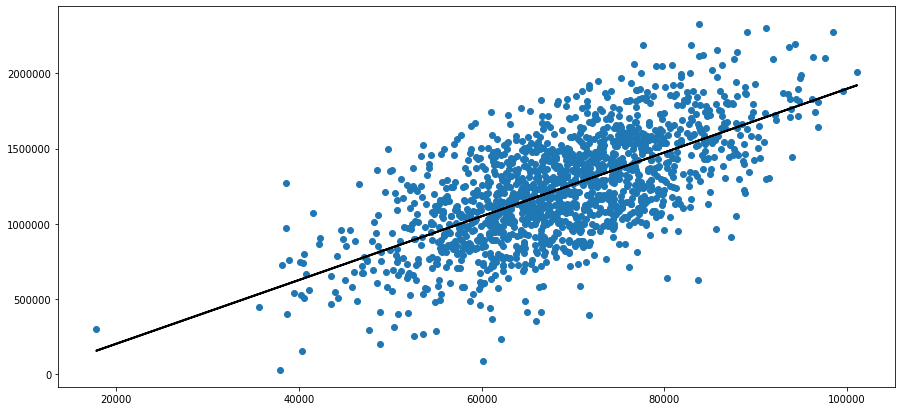

In [19]:
plt.figure(figsize=(15, 7))
plt.scatter(X_test_uni, y_test_uni)
plt.plot(X_test_uni, predictions_uni, color='black', linewidth=2);

#### Agora as predições para o modelo multivariado

In [31]:
predictions_multi = lm_multi.predict(X_test)

#### Aplique as métricas de avaliação do modelo e compare os resultados

##### Univariável

In [33]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
print("========Univariável========")
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test_uni, predictions_uni)))
print('R2: %.2f' % r2_score(y_test_uni, predictions_uni))

========Univariável========
RMSE: 268713.97
R2: 0.42


In [35]:
sns.set(style="ticks", color_codes=True)

values = np.concatenate((y_test_uni.values.reshape(-1,1), predictions_uni), axis=1)
results = pd.DataFrame(values, columns= ['label', 'prediction'])
results.head()

,label,prediction
0,1.251689e+06,1.192922e+06
1,8.730483e+05,1.095718e+06
2,1.696978e+06,1.338354e+06
3,1.063964e+06,1.089884e+06
4,9.487883e+05,1.323524e+06


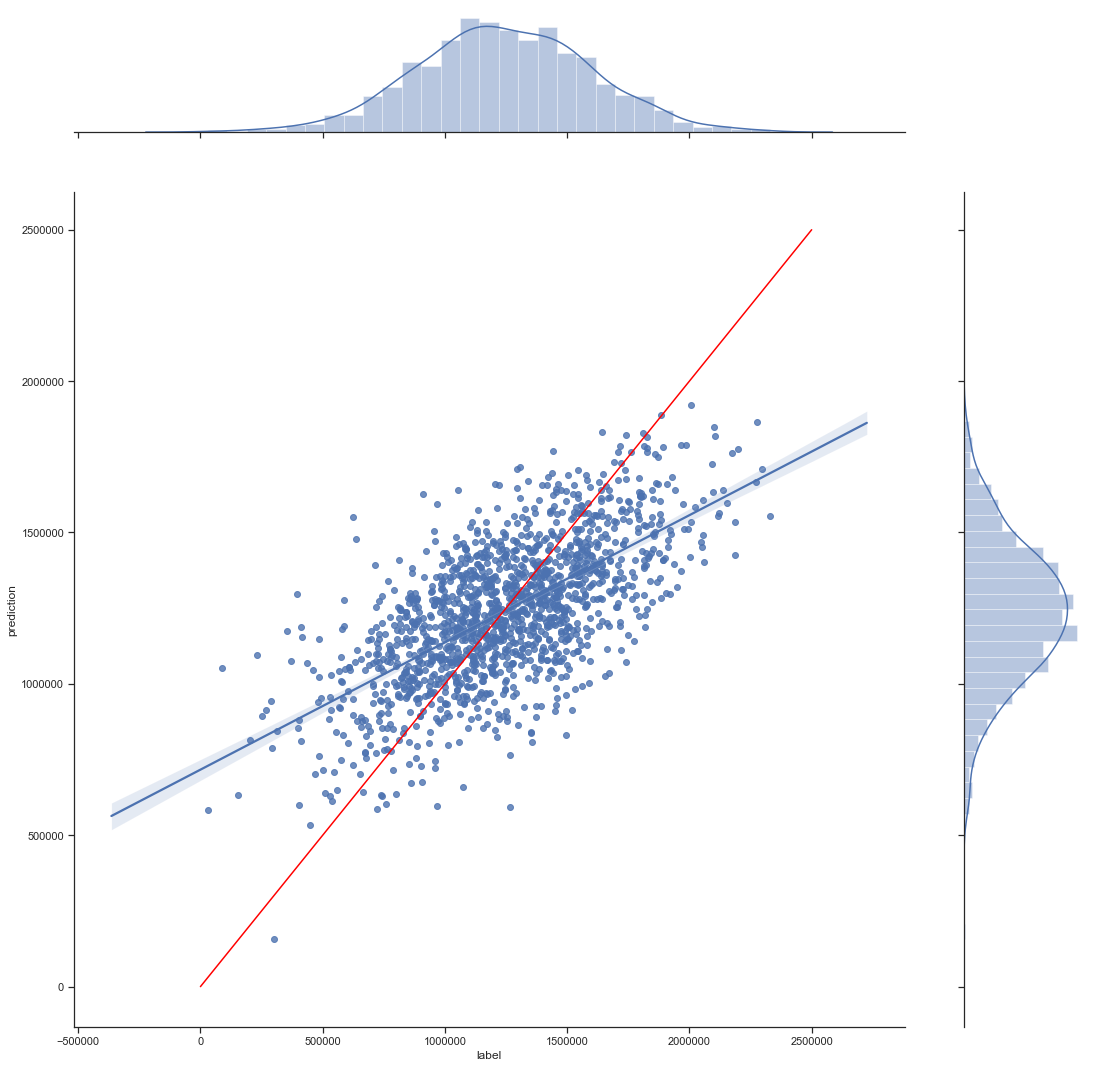

In [36]:
sns.jointplot(x='label', y='prediction', data=results, kind='reg',space=0.5, height=15)
plt.plot([0,2500000], [0,2500000], color='red')

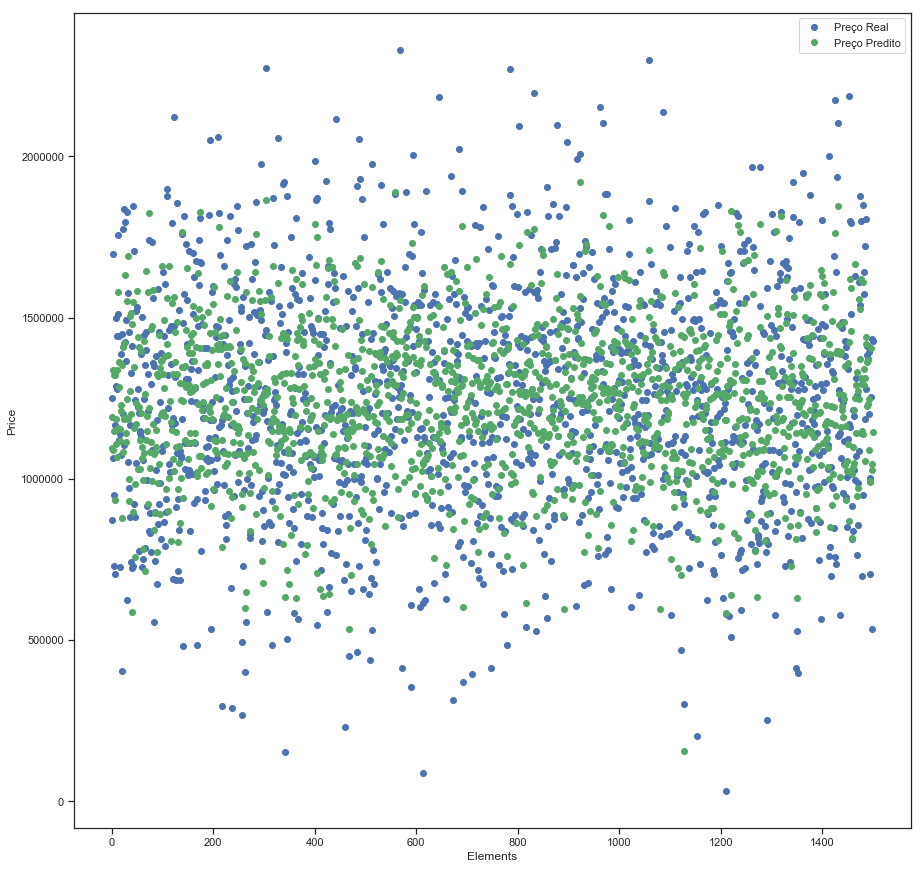

In [38]:
plt.rcParams['figure.figsize'] = [15, 15]

plt.plot(range(0, results.shape[0]), results['label'], 'bo')
plt.plot(range(0, results.shape[0]), results['prediction'], 'go')

plt.legend(("Preço Real","Preço Predito"))
plt.xlabel("Elements")
plt.ylabel("Price")

plt.show()

##### Multivariável

In [39]:
print("========Multivariável========")
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, predictions_multi)))
print('R2: %.2f' % r2_score(y_test, predictions_multi))

========Multivariável========
RMSE: 158729.29
R2: 0.80


In [40]:
sns.set(style="ticks", color_codes=True)
values = np.concatenate((y_test.values.reshape(-1,1), predictions_multi.reshape(-1,1)), axis=1)
results = pd.DataFrame(values, columns= ['label', 'prediction'])

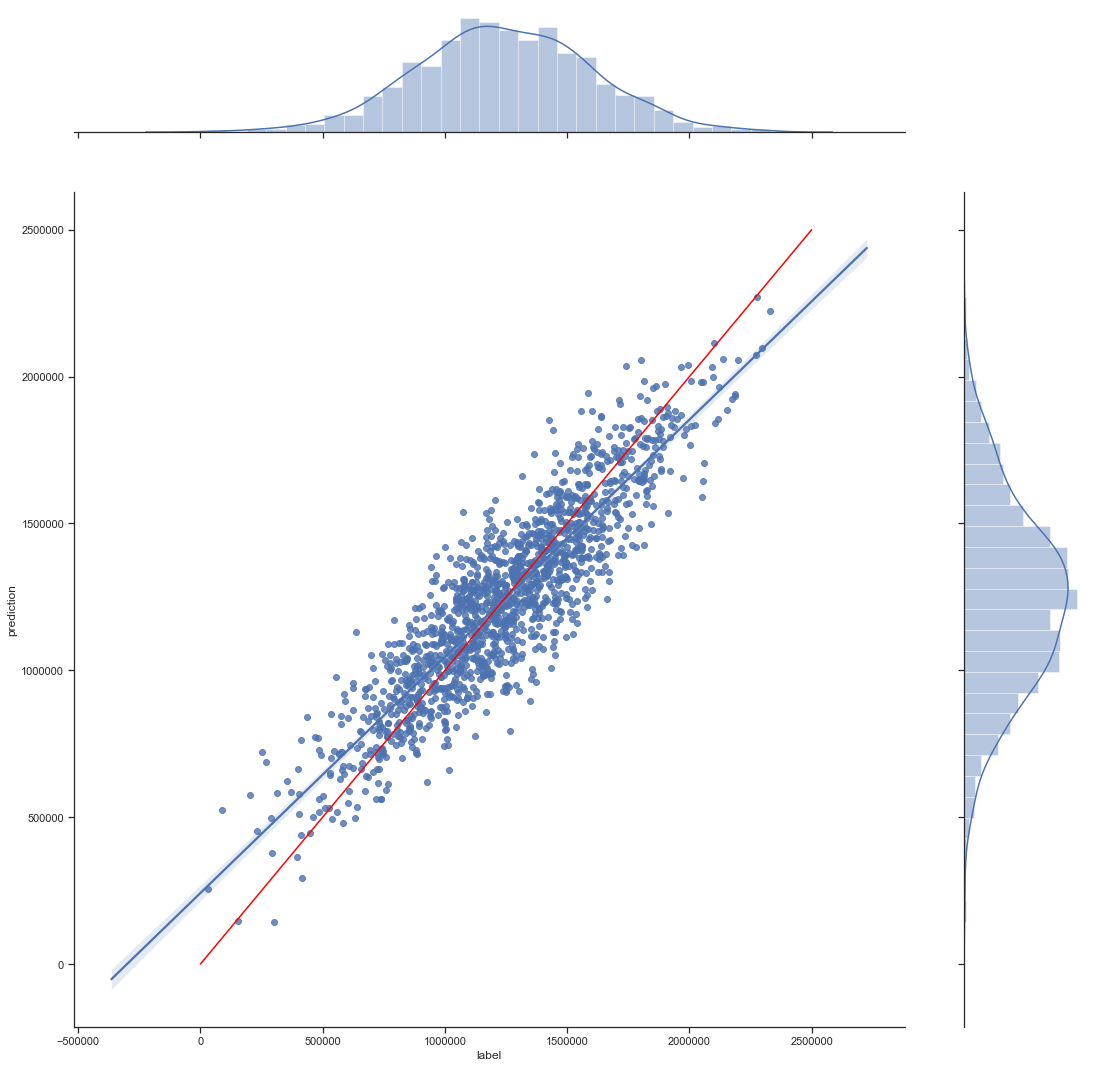

In [41]:
sns.jointplot(x='label', y='prediction', data=results, kind='reg',space=0.5, height=15)
plt.plot([0,2500000], [0,2500000], color='red')

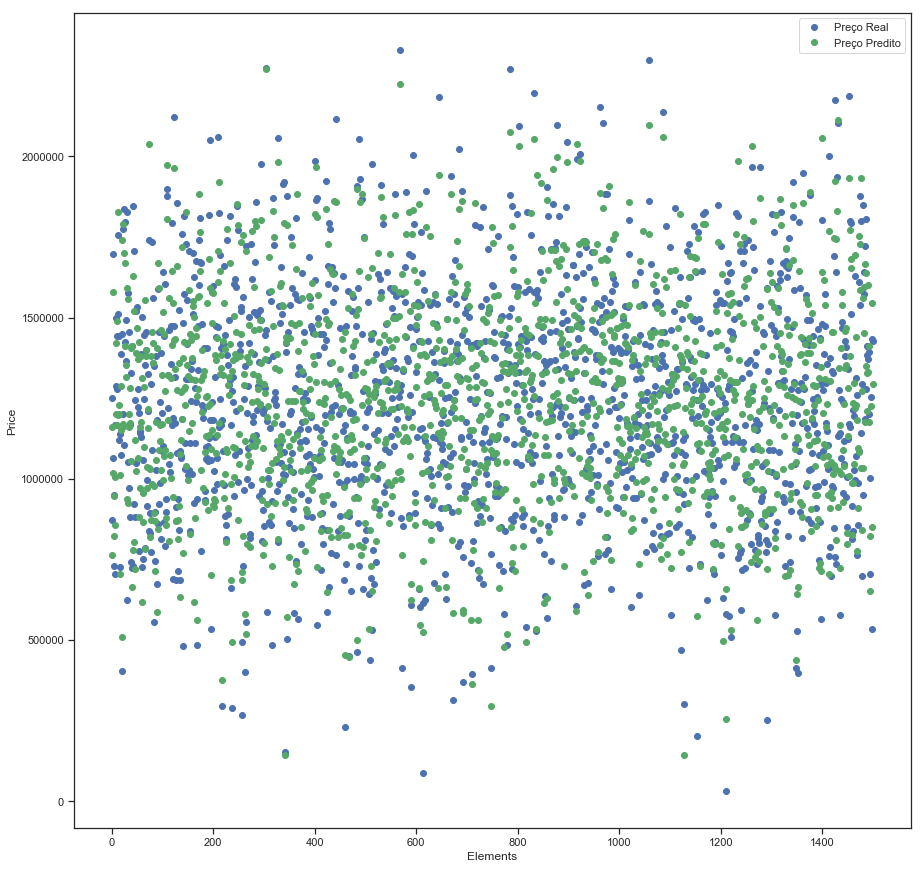

In [42]:
plt.rcParams['figure.figsize'] = [15, 15]

plt.plot(range(0, results.shape[0]), results['label'], 'bo')
plt.plot(range(0, results.shape[0]), results['prediction'], 'go')

plt.legend(("Preço Real","Preço Predito"))
plt.xlabel("Elements")
plt.ylabel("Price")

plt.show()

## Regressão polinomial

#### Fique a vontade para aplicar [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) do sklearn para obter uma regressão polinomial dos modelos anteriores.
   - Aplique tanto para o modelo univariado quanto para o multivariado.

In [43]:
def print_metrics(description, label, predictions):
    print(description)
    print("RMSE: %.2f" % np.sqrt(mean_squared_error(label, predictions)))
    print('R2: %.2f' % r2_score(label, predictions))

#### Univariável

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

#print(X_train_uni, " ", X_train_uni.shape)
X2_train_uni = poly.fit_transform(X_train_uni)

#print(X2_train_uni, " ", X2_train_uni.shape)
X2_teste_uni = poly.fit_transform(X_test_uni)

model = LinearRegression().fit(X2_train_uni, y_train_uni)
predictions = model.predict(X2_teste_uni)
print_metrics('Regressão Univariada com grau de polinomio 3', y_test_uni, predictions)

Regressão Univariada com grau de polinomio 3
RMSE: 268544.29
R2: 0.42


#### Multivariada

In [49]:
poly = PolynomialFeatures(degree=3)
#print(X_train.iloc[0], " ", X_train.shape)
X2_train = poly.fit_transform(X_train)
#print(X2_train[0], " ", X2_train.shape)
X2_test = poly.fit_transform(X_test)
model = LinearRegression().fit(X2_train, y_train)
predictions = model.predict(X2_test)
print_metrics('Regressão Multivariada com grau de polinomio 3', y_test, predictions)

Regressão Multivariada com grau de polinomio 3
RMSE: 159030.54
R2: 0.80


***O exemplo abaixo foi extraído do Python [Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html)***

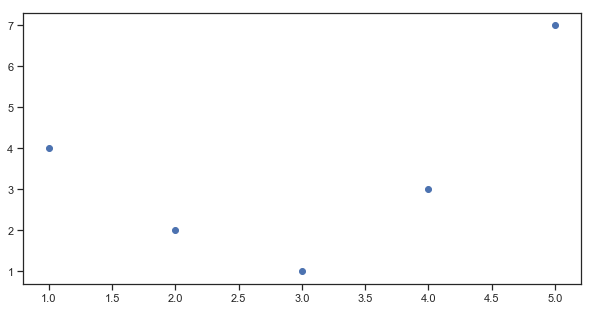

In [52]:
plt.rcParams['figure.figsize'] = [10, 5]
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

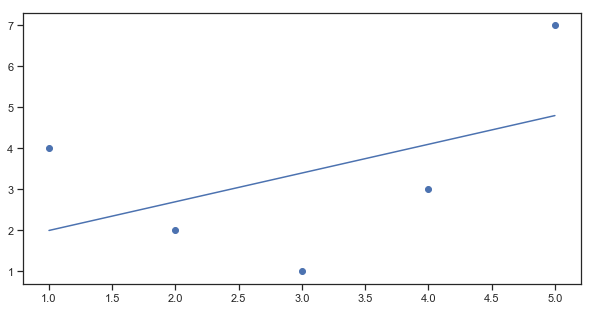

In [53]:
X = x[:, np.newaxis]
#X = x.reshape(-1,1)
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [60]:
poly = PolynomialFeatures(degree=3)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]


***Observe que a tranfosrmação cria uma [matriz de Vandormonde](https://pt.wikipedia.org/wiki/Matriz_de_Vandermonde)***

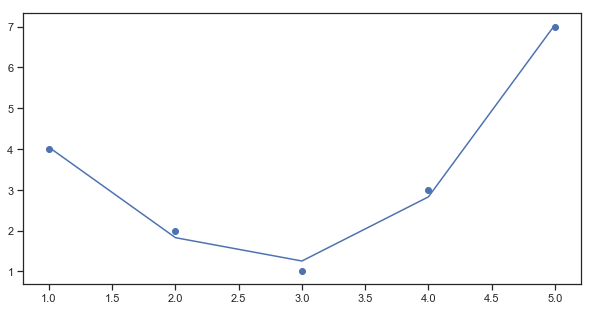

In [61]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);